Loading data

In [2]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Train a Random Forest classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Measure training time
start_time = time.time()
clf.fit(X_train, y_train) # Train the classifier
end_time = time.time()

# Calculate and print training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Training time: 73.02221655845642 seconds
Accuracy on test set: 87.72%


use PCA to reduce the dataset's dimensionality (with an explained variance ratio of 95%)

In [4]:
from sklearn.decomposition import PCA

# Assuming X_train and X_test are already defined

# Initialize PCA
pca = PCA(n_components=0.95)

# Fit PCA on the training data
pca.fit(X_train)

# Transform both training and testing data
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

# Print the reduction results
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_reduced.shape[1]}")


Original number of features: 784
Reduced number of features: 187


Train a new Random Forest classifier on the reduced dataset and measure how long it takes

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize the Random Forest classifier
clf_reduced = RandomForestClassifier(n_estimators=100)

# Measure training time
start_time = time.time()
clf_reduced.fit(X_train_reduced, y_train)  # Train using the reduced dataset
end_time = time.time()

# Calculate and print the training time
training_time_reduced = end_time - start_time
print(f"Training time on the reduced dataset: {training_time_reduced:.3f} seconds")

# Evaluate the classifier on the reduced test set
y_pred_reduced = clf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy on the reduced test set: {accuracy_reduced * 100:.2f}%")


Training time on the reduced dataset: 117.980 seconds
Accuracy on the reduced test set: 85.76%


despite it being reduced it took longer than the frist dataset

While PCA can be a powerful tool for managing high-dimensional datasets, its impact on model training and performance can vary. These outcomes highlight the importance of empirically testing the effects of dimensionality reduction in the context of specific datasets and modeling tasks, rather than assuming universal benefits.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the softmax regression model on scaled data
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
start_time = time.time()
softmax_reg.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate and print the training time
training_time_softmax = end_time - start_time
print(f"Training time for softmax regression on scaled data: {training_time_softmax:.3f} seconds")

# Evaluate the model on the scaled test set
y_pred_softmax = softmax_reg.predict(X_test_scaled)
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print(f"Accuracy of softmax regression on the scaled test set: {accuracy_softmax * 100:.2f}%")


Training time for softmax regression on scaled data: 230.949 seconds
Accuracy of softmax regression on the scaled test set: 83.44%


Apply softmax regression (using the reduced dataset) and time how long it takes, then evaluate the resulting model on the test set. 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)


# Initialize and train the softmax regression model
softmax_reg_reduced = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, C=1e5)
start_time = time.time()
softmax_reg_reduced.fit(X_train_reduced_scaled, y_train)
end_time = time.time()

# Calculate and print the training time
training_time_softmax_reduced = end_time - start_time
print(f"Training time for softmax regression on reduced dataset: {training_time_softmax_reduced:.3f} seconds")

# Make predictions and evaluate the model
y_pred_softmax_reduced = softmax_reg_reduced.predict(X_test_reduced_scaled)
accuracy_softmax_reduced = accuracy_score(y_test, y_pred_softmax_reduced)
print(f"Accuracy of softmax regression on the reduced test set: {accuracy_softmax_reduced * 100:.2f}%")



Training time for softmax regression on reduced dataset: 32.344 seconds
Accuracy of softmax regression on the reduced test set: 84.24%



From the results, it can be concluded that applying softmax regression to the reduced dataset significantly reduced the training time—from 232.169 seconds for the original dataset to just 31.005 seconds for the reduced dataset—while also slightly improving the accuracy, from 83.44% to 84.24%s

Take a random subset of 12,500 images. Hint: use NumPyLinks to an external site..

In [11]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Determine the number of images you want in your subset
subset_size = 12500

# Generate random indices to select a subset from the original dataset
random_indices = np.random.choice(len(X_train), subset_size, replace=False)

# Select the subset of images using the random indices
subset_images = X_train[random_indices]

# Verify the shape of the subset
print("Shape of subset images:", subset_images.shape)


Shape of subset images: (12500, 784)


Now let's use t-SNE to reduce dimensionality down to 2D. Hint use sklearn manifold libraryLinks to an external site..

In [12]:
from sklearn.manifold import TSNE

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the subset of images to 2D
subset_images_2d = tsne.fit_transform(subset_images)

# Verify the shape of the reduced dataset
print("Shape of reduced dataset:", subset_images_2d.shape)


Shape of reduced dataset: (12500, 2)


Plot a scatterplot using different colours for each class (T-shirt, trouser, Pullover etc.).

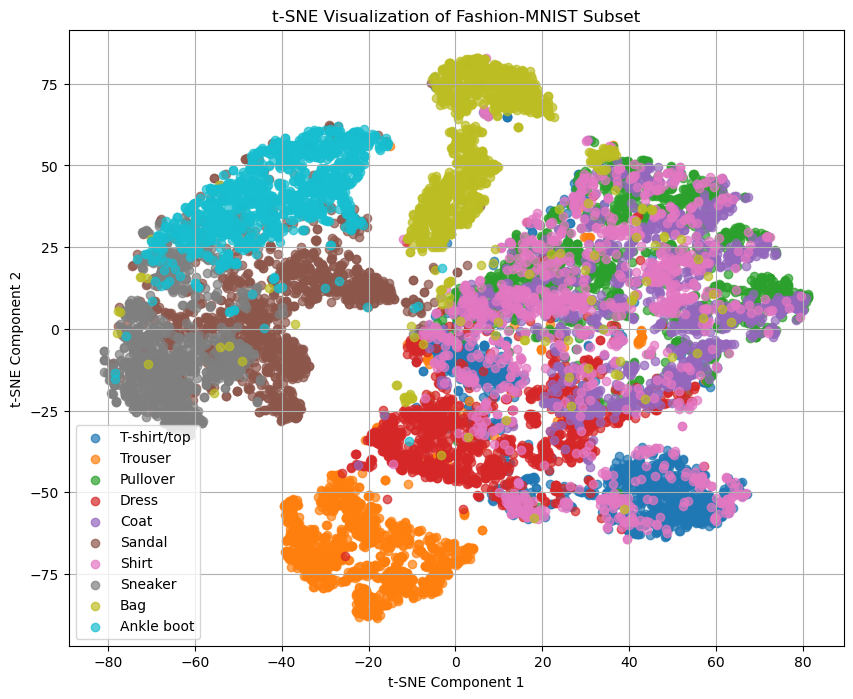

In [13]:
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create a dictionary to map class labels to colors
class_colors = {i: plt.cm.tab10(i) for i in range(len(class_labels))}

# Create a scatterplot
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.scatter(subset_images_2d[y_train[random_indices] == i, 0], 
                subset_images_2d[y_train[random_indices] == i, 1], 
                label=class_labels[i], color=class_colors[i], alpha=0.7)
plt.title("t-SNE Visualization of Fashion-MNIST Subset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


Cluster Separation,Overlap between Classes, Overlap between Classes,Noisy Data,Dimensionality Reduction Effectiveness

Now try t-SNE for a combination of 3 class labels: sneaker, bag and t-shirt. 

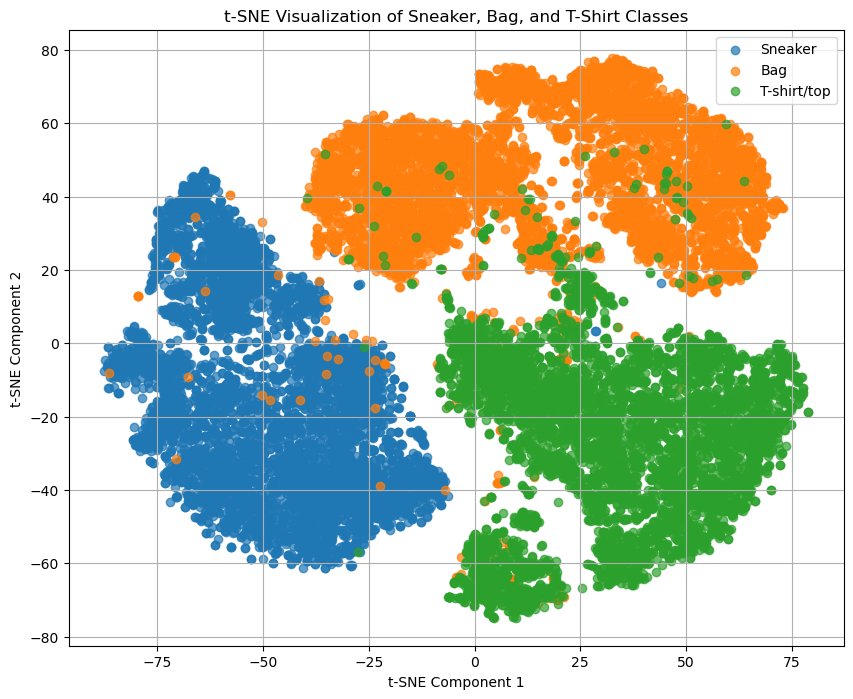

In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Filter the dataset to include only samples corresponding to sneaker, bag, and t-shirt classes
selected_classes = [7, 8, 0]  # Labels for sneaker, bag, and t-shirt classes
selected_indices = np.where(np.isin(y_train, selected_classes))[0]
subset_images_selected = X_train[selected_indices]
subset_labels_selected = y_train[selected_indices]

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
subset_images_selected_2d = tsne.fit_transform(subset_images_selected)

# Plot the scatterplot
plt.figure(figsize=(10, 8))
for i in range(len(selected_classes)):
    plt.scatter(subset_images_selected_2d[subset_labels_selected == selected_classes[i], 0], 
                subset_images_selected_2d[subset_labels_selected == selected_classes[i], 1], 
                label=class_labels[selected_classes[i]], alpha=0.7)
plt.title("t-SNE Visualization of Sneaker, Bag, and T-Shirt Classes")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Distinct Clusters: The scatter plot exhibits clear and distinct clusters corresponding to each class, Separation between Classes, Intra-Class Variability, Usefulness for Classification